In [1]:

## module gaussPivot
'''
    x = gaussPivot(a,b,tol=1.0e-12).
    Solves [a]{x} = {b} by Gauss elimination with
    scaled row pivoting
'''
import numpy as np
#import swap
#import error
def gaussPivot(a,b,tol=1.0e-12):
    n = len(b)
  # Set up scale factors
    s = np.zeros(n)
    for i in range(n):
        s[i] = max(np.abs(a[i,:]))
    for k in range(0,n-1):
  # Row interchange, if needed
        p = np.argmax(np.abs(a[k:n,k])/s[k:n]) + k
        if abs(a[p,k]) < tol: error.err('Matrix is singular')
        if p != k:
            swapRows(b,k,p)
            swapRows(s,k,p)
            swapRows(a,k,p)
      # Elimination
        for i in range(k+1,n):
            if a[i,k] != 0.0:
                lam = a[i,k]/a[k,k]
                a[i,k+1:n] = a[i,k+1:n] - lam*a[k,k+1:n]
                b[i] = b[i] - lam*b[k]
    
    if abs(a[n-1,n-1]) < tol: error.err('Matrix is singular')
  # Back substitution
    b[n-1] = b[n-1]/a[n-1,n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - np.dot(a[k,k+1:n],b[k+1:n]))/a[k,k]
    
    return b

## module swap
'''
    swapRows(v,i,j).
    Swaps rows i and j of a vector or matrix [v].
    swapCols(v,i,j).
    Swaps columns of matrix [v]
'''
def swapRows(v,i,j):
    if len(v.shape) == 1:
        v[i],v[j] = v[j],v[i]
    else:
        v[[i,j],:] = v[[j,i],:]

def swapCols(v,i,j):
    v[:,[i,j]] = v[:,[j,i]]





### module LUdecomp3
''' 
    c,d,e = LUdecomp3(c,d,e).
    LU decomposition of tridiagonal matrix [c\d\e]. On output
    {c},{d} and {e} are the diagonals of the decomposed matrix.
    x = LUsolve(c,d,e,b).
    Solves [c\d\e]{x} = {b}, where {c}, {d} and {e} are the
    vectors returned from LUdecomp3.
'''

def LUdecomp3(c,d,e):
    n = len(d)
    for k in range(1,n):
        lam = c[k-1]/d[k-1]
        d[k] = d[k] - lam*e[k-1]
        c[k-1] = lam
    
    return c,d,e

def LUsolve3(c,d,e,b):
    n = len(d)
    for k in range(1,n):
        b[k] = b[k] - c[k-1]*b[k-1]
    
    b[n-1] = b[n-1]/d[n-1]
    for k in range(n-2,-1,-1):
        b[k] = (b[k] - e[k]*b[k+1])/d[k]
    
    return b




### module neville
'''
    p = neville(xData,yData,x).
    Evaluates the polynomial interpolant p(x) that passes
    through the specified data points by Neville’s method.
'''
def neville(xData, yData, x):
    m = len(xData) # number of data points
    y = yData.copy()
    for k in range(1, m):
        y[0:m-k] = ((x-xData[k:m])*y[0:m-k] + 
                (xData[0:m-k] - x)*y[1:m-k+1])/(xData[0:m-k] - xData[k:m])

    return y[0]



## module newtonPoly
'''
    p = evalPoly(a,xData,x).
    Evaluates Newton’s polynomial p at x. The coefficient
    vector {a} can be computed by the function ’coeffts’.
    a = coeffts(xData,yData).
    Computes the coefficients of Newton’s polynomial.
'''
def evalPoly(a,xData,x):
    n = len(xData) - 1  # Degree of polynomial
    p = a[n]
    for k in range(1,n+1):
        p = a[n-k] + (x -xData[n-k])*p
    return p

def coeffts(xData,yData):
    m = len(xData)  # Number of data points
    a = yData.copy()
    for k in range(1,m):
        a[k:m] = (a[k:m] - a[k-1])/(xData[k:m] - xData[k-1])
    return a



## module plotPoly
'''
    plotPoly(xData,yData,coeff,xlab=’x’,ylab=’y’)
    Plots data points and the fitting
    polynomial defined by its coefficient
    array coeff = [a0, a1. ...]
    xlab and ylab are optional axis labels
'''
import numpy as np
import matplotlib.pyplot as plt
def plotPoly(xData,yData,coeff,xlab='x',ylab='y'):
    m = len(coeff)
    x1 = min(xData)
    x2 = max(xData)
    dx = (x2 - x1)/20.0
    x = np.arange(x1,x2 + dx/10.0,dx)
    y = np.zeros((len(x)))*1.0
    for i in range(m):
        y = y + coeff[i]*x**i
    
    plt.plot(xData,yData,'o',x,y,'-')
    plt.xlabel(xlab); plt.ylabel(ylab)
    plt.grid(True)
    plt.show()
    
    
    
    
## module polyFit
'''
    c = polyFit(xData,yData,m).
    Returns coefficients of the polynomial
    p(x) = c[0] + c[1]x + c[2]xˆ2 +...+ c[m]xˆm
    that fits the specified data in the least
    squares sense.
    sigma = stdDev(c,xData,yData).
    Computes the std. deviation between p(x)
    and the data.
'''

def polyFit(xData,yData,m):
    a = np.zeros((m+1,m+1))
    b = np.zeros(m+1)
    s = np.zeros(2*m+1)
    for i in range(len(xData)):
        temp = yData[i]
        for j in range(m+1):
            b[j] = b[j] + temp
            temp = temp*xData[i]
        temp = 1.0
        for j in range(2*m+1):
            s[j] = s[j] + temp
            temp = temp*xData[i]
    for i in range(m+1):
        for j in range(m+1):
            a[i,j] = s[i+j]

    return gaussPivot(a,b)

def stdDev(c,xData,yData):

    def evalPoly(c,x):
        m = len(c) - 1
        p = c[m]
        for j in range(m):
            p = p*x + c[m-j-1]
        return p
    
    n = len(xData) - 1
    m = len(c) - 1
    sigma = 0.0
    for i in range(n+1):
        p = evalPoly(c,xData[i])
        sigma = sigma + (yData[i] - p)**2
    sigma = math.sqrt(sigma/(n - m))
    return sigma



## module rational
'''
    p = rational(xData,yData,x)
    Evaluates the diagonal rational function interpolant p(x)
    that passes through the data points
'''

import numpy as np

def rational(xData, yData, x):
    m = len(xData)
    r = yData.copy()
    rOld = np.zeros(m)
    for k in range(m-1):
        for i in range(m-k-1):
            if abs(x - xData[i+k+1]) < 1.0e-9:
                return yData[i+k+1]
            else:
                c1 = r[i+1] - r[i]
                c2 = r[i+1] - rOld[i+1]
                c3 = (x - xData[i])/(x - xData[i+k+1])
                r[i] = r[i+1] + c1/(c3*(1.0 - c1/c2) - 1.0)
                rOld[i+1] = r[i+1]

    return r[0]



## module cubicSpline
'''
    k = curvatures(xData,yData).
    Returns the curvatures of cubic spline at its knots.
    y = evalSpline(xData,yData,k,x).
    Evaluates cubic spline at x. The curvatures k can be
    computed with the function ’curvatures’.
'''

def curvatures(xData,yData):
    n = len(xData) - 1
    c = np.zeros(n)
    d = np.ones(n+1)
    e = np.zeros(n)
    k = np.zeros(n+1)
    c[0:n-1] = xData[0:n-1] - xData[1:n]
    d[1:n] = 2.0*(xData[0:n-1] - xData[2:n+1])
    e[1:n] = xData[1:n] - xData[2:n+1]
    k[1:n] =6.0*(yData[0:n-1] - yData[1:n])/(xData[0:n-1] - xData[1:n]) \
            - 6.0*(yData[1:n] - yData[2:n+1])/(xData[1:n] - xData[2:n+1])
    LUdecomp3(c,d,e)
    LUsolve3(c,d,e,k)
    
    return k

def evalSpline(xData,yData,k,x):
    def findSegment(xData,x):
        iLeft = 0
        iRight = len(xData)- 1
        while 1:
            if (iRight-iLeft) <= 1: return iLeft
            i =(iLeft + iRight)/2
            if x < xData[i]: iRight = i
            else: iLeft = i
    i = findSegment(xData,x)
    h = xData[i] - xData[i+1]
    y = ((x - xData[i+1])**3/h - (x - xData[i+1])*h)*k[i]/6.0 \
            - ((x - xData[i])**3/h - (x - xData[i])*h)*k[i+1]/6.0   \
            + (yData[i]*(x - xData[i+1])                            \
            - yData[i+1]*(x - xData[i]))/h
            
    return y




# Examples

## Newton

In [2]:
#!/usr/bin/python
## example3_4
import numpy as np
import math
#from newtonPoly import *

xData = np.array([0.15,2.3,3.15,4.85,6.25,7.95])
yData = np.array([4.79867,4.49013,4.2243,3.47313,2.66674,1.51909])
a = coeffts(xData,yData)
print(" x    yInterp   yExact")
print("-----------------------")
for x in np.arange(0.0,8.1,0.5):
    y = evalPoly(a,xData,x)
    yExact = 4.8*math.cos(math.pi*x/20.0)
    print('{:3.1f} {:9.5f} {:9.5f}'.format(x,y,yExact))
#input("\nPress return to exit")

 x    yInterp   yExact
-----------------------
0.0   4.80003   4.80000
0.5   4.78518   4.78520
1.0   4.74088   4.74090
1.5   4.66736   4.66738
2.0   4.56507   4.56507
2.5   4.43462   4.43462
3.0   4.27683   4.27683
3.5   4.09267   4.09267
4.0   3.88327   3.88328
4.5   3.64994   3.64995
5.0   3.39411   3.39411
5.5   3.11735   3.11735
6.0   2.82137   2.82137
6.5   2.50799   2.50799
7.0   2.17915   2.17915
7.5   1.83687   1.83688
8.0   1.48329   1.48328


## Neville

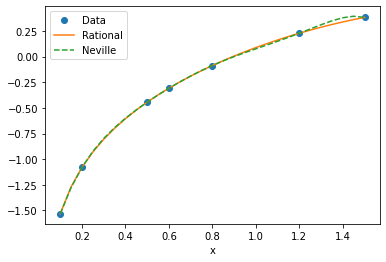

In [3]:
#!/usr/bin/python
## example 3_6
import numpy as np
#from rational import *
#from neville import *
import matplotlib.pyplot as plt

xData = np.array([0.1,0.2,0.5,0.6,0.8,1.2,1.5])
yData = np.array([-1.5342,-1.0811,-0.4445,-0.3085, \
        -0.0868,0.2281,0.3824])

x = np.arange(0.1,1.55,0.05)
n = len(x)
y = np.zeros((n,2))
for i in range(n):
    y[i,0] = rational(xData,yData,x[i])
    y[i,1] = neville(xData,yData,x[i])

plt.plot(xData,yData,'o',x,y[:,0],'-',x,y[:,1],'--')
plt.xlabel('x')
plt.legend(('Data','Rational','Neville'),loc = 0)
plt.show()
#input("\nPress return to exit")

## Spline

In [4]:
#!/usr/bin/python
## example3_9

import numpy as np
#from cubicSpline import *
xData = np.array([1,2,3,4,5],float)
yData = np.array([0,1,0,1,0],float)
k = curvatures(xData,yData)

while True:
    try: x = eval(input("\nx ==> "))
    except SyntaxError: break
    print("y =",evalSpline(xData,yData,k,x))
#input("Done. Press return to exit")


x ==> 10


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## Polyfit

In [ ]:
#!/usr/bin/python
## example3_12
import numpy as np
import math
#from polyFit import *
xData = np.array([-0.04,0.93,1.95,2.90,3.83,5.0,      \
        5.98,7.05,8.21,9.08,10.09])
yData = np.array([-8.66,-6.44,-4.36,-3.27,-0.88,0.87, \
        3.31,4.63,6.19,7.4,8.85])
while True:
    try:
        m = eval(input("\nDegree of polynomial ==> "))
        coeff = polyFit(xData,yData,m)
        print("Coefficients are:\n",coeff)
        print("Std. deviation =",stdDev(coeff,xData,yData))
    except SyntaxError: break

#input("Finished. Press return to exit")